In [ ]:
# Necessary knowledge of biopython can be gotten here:
# "Biopython cookbook http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25
# "Python Script To Translate Rna Sequences To Protein Sequences" https://www.biostars.org/p/2903/
# SeqRecord http://biopython.org/wiki/SeqRecord
# SeqIO http://biopython.org/DIST/docs/api/Bio.SeqIO-module.html

In [12]:
import pandas as pd
from Bio.Seq import Seq
from Bio import SeqIO

In [13]:
# provided function 1
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [14]:
# function 2, adapted from YouTube tutorial "Translation from DNA to Protein." By Hong Qin
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_seq_string =""
    for i in range(0, len(string_nucleotides), 3):  
        codon = string_nucleotides[i:i+3]   
        aminoacid = mito_table.forward_table[codon] 
        aa_seq_string += aminoacid        
    return(aa_seq_string)
# works.

In [15]:
# funtion 3, alternative function
from Bio.Seq import Seq
def alt_translate(alt_aa_seq):
#Define your sequence to be translated
    coding_dna = Seq(alt_aa_seq)
    alt_aa_seq = coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return alt_aa_seq

In [16]:
# function 4, aa type and ratio (3 functions). 
# Loops over aa_seq to count what is defined as a charged amino acid. Same thing done for polar and hydrophobic
# The final count, divided by total length, would be the ratio.
def charged(aa_seq): 
    charged = ['R','K','D','E'] 
    count = 0 
    for aa in aa_seq: 
        if aa in charged:
            count += 1 
    return(count/len(aa_seq)) 

def polar(aa_seq): 
    polar = ['Q','N','H','S','T','Y','C','M','W']
    count = 0 
    for aa in aa_seq: 
        if aa in polar:
            count += 1 
    return(count/len(aa_seq)) 


def hydrophobic(aa_seq): 
    hydrophobic = ['A','I','L','F','V','P','G']
    count = 0 
    for aa in aa_seq: 
        if aa in hydrophobic:
            count += 1 
    return(count/len(aa_seq)) 

In [17]:
########
# MAIN

# this is to create the dictionary of parse extracted names and sequences
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bear_df = pd.read_csv("bears_data.csv") 
species_list = list(bear_df.species)
# these should be fine. 
bear_df


,species,mass,charged,polar,hydrophobic
0,Ursus spelaeus,550.800,NaN,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN,NaN


In [18]:
# resetting the counter
row_counter = 0
# for each key and value (species name and seq) in the cytochrome B dictionary, 
# use my alternative translate function to get proportion of aa type (charged, polar, or hydrophobic). 
# The function needs to take string as input.
for key,value in cytb_seqs.items(): 
    aa_seq = alt_translate(str(value)) 
    charged_aa = charged(aa_seq)
    polar_aa = polar(aa_seq)
    hydrophobic_aa = hydrophobic(aa_seq)
    # set the value for each proportion in the dataframe. The for loop iterates over rows one at a time
    bear_df.set_value(row_counter, 'charged', charged_aa) 
    bear_df.set_value(row_counter, 'polar', polar_aa) 
    bear_df.set_value(row_counter, 'hydrophobic', hydrophobic_aa)
    row_counter = row_counter + 1 
bear_df

,species,mass,charged,polar,hydrophobic
0,Ursus spelaeus,550.800,0.092348,0.329815,0.577836
1,Ursus arctos,203.500,0.092348,0.324538,0.583113
2,Ursus thibetanus,99.714,0.092348,0.327177,0.580475
3,Melursus ursinus,100.030,0.089710,0.340369,0.569921
4,Ursus americanus,110.560,0.089710,0.337731,0.572559
5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282
6,Ailuropoda melanoleuca,118.200,0.089710,0.343008,0.567282
7,Tremarctos ornatus,140.700,0.089710,0.335092,0.575198
8,Ursus maritimus,425.100,0.092348,0.327177,0.580475


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

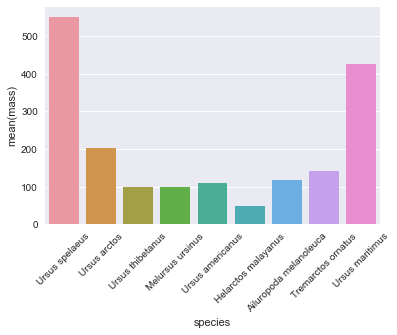

In [19]:
# import the matplotlib magic function. Apparently there are so many magic functions!
%matplotlib inline
import seaborn as sea
import matplotlib.pyplot as plt
sea.barplot(x='species', y='mass', data=bear_df)
plt.xticks(rotation=45)
#to rotate labels so I can actually see: http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

# The biggest bear was the U. spelaeus, which was over 500 kgs average. The composition of aa types are not very different across species. Although, as a biologist, I'd think that there could be real differences in the hydrophobic aa between the highest and lowest proportions, however small. I didn't expect that there is 1.6% difference between H. malayanus and U. arctos, but I suspect that if we compared across more genes this differences would be less.
# What else is interesting about this bear? This seems like an open-ended question, so I'll just say that apparently it was discovered in Italy that Neanderthals used to worship these cave bears.


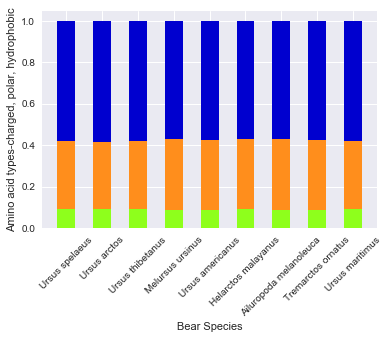

In [20]:
# there is an example to exactly this: http://matplotlib.org/examples/pylab_examples/bar_stacked.html
import numpy as np
import matplotlib.pyplot as plt
# the independent variable goes on x axis, and I changed the color so the plot doesn't look like a Christmas tree. Two of the parts needs to be sent to the bottom, otherwise the plot doesn't show.
ind = np.arange(len(bear_df))
width = 0.5
p1 = plt.bar(ind, bear_df.charged, width, color="#8eff1c") 
p2 = plt.bar(ind, bear_df.polar, width, bottom=bear_df.charged, color="#ff8e1c")
p3 = plt.bar(ind, bear_df.hydrophobic, width, bottom=bear_df.charged + bear_df.polar, color='#0000cf')
plt.ylabel('Amino acid types-charged, polar, hydrophobic')
plt.xlabel('Bear Species')
plt.xticks(ind, (bear_df.species), rotation=45)
plt.show()

In [21]:
#exporting file to CSV
bear_df.to_csv('bears_mass_cytb.csv')